In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the dataset from a CSV file
df = pd.read_csv('dataset.csv')

# Display the first few rows to understand the data structure
df.head()


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [12]:
# Download necessary nltk resources
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function for text cleaning and preprocessing
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization
    tokens = text.split()

    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Fill missing values with an empty string in 'crimeaditionalinfo' column
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].fillna('')

# Apply the cleaning function to the 'crimeaditionalinfo' column
df['cleaned_info'] = df['crimeaditionalinfo'].apply(clean_text)

# Display the first few rows of the cleaned data
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,sub_category,crimeaditionalinfo,cleaned_info
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,continu receiv random call abus messag whatsap...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,fraudster continu messag ask pay money send fa...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,act like polic demand money ad section text me...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,apna job appli job interview telecal resourc m...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,receiv call ladi state send new phone vivo rec...


In [13]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['cleaned_info'])

# Target variable (e.g., 'category' as the labels)
y = df['category']


In [22]:
df.isnull().sum()

,0
category,0
sub_category,6591
crimeaditionalinfo,0


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7417
Precision: 0.7090
Recall: 0.7417
F1 Score: 0.7124
Confusion Matrix:
[[  870     0     0     0     0    16     0  1713     0   555     0     0
      0     0     1]
 [    3     0     0     0     0     0     0    17     0    82     0     0
      0     0     1]
 [   51     0     6     0     0     0     0    62     0     9     0     0
      0     0     0]
 [    0     0     0  1128     0     0     0     0     0     0     0     0
      0     0     0]
 [   16     0     0     0     0     2     0    19     0    22     0     0
      0     0     0]
 [  134     0     0     0     0    46     0   105     0   226     0     0
      0     0     0]
 [    6     0     0     0     0     0     0    31     0    16     0     0
      0     0     0]
 [  939     0     1     0     0    17     0 15731     0   587     0     1
      0     0     0]
 [   28     0     0     0     0     0     0   102     0    25     0     0
      0     0     0]
 [  370     0     0     0     0    20     0   942     0  230

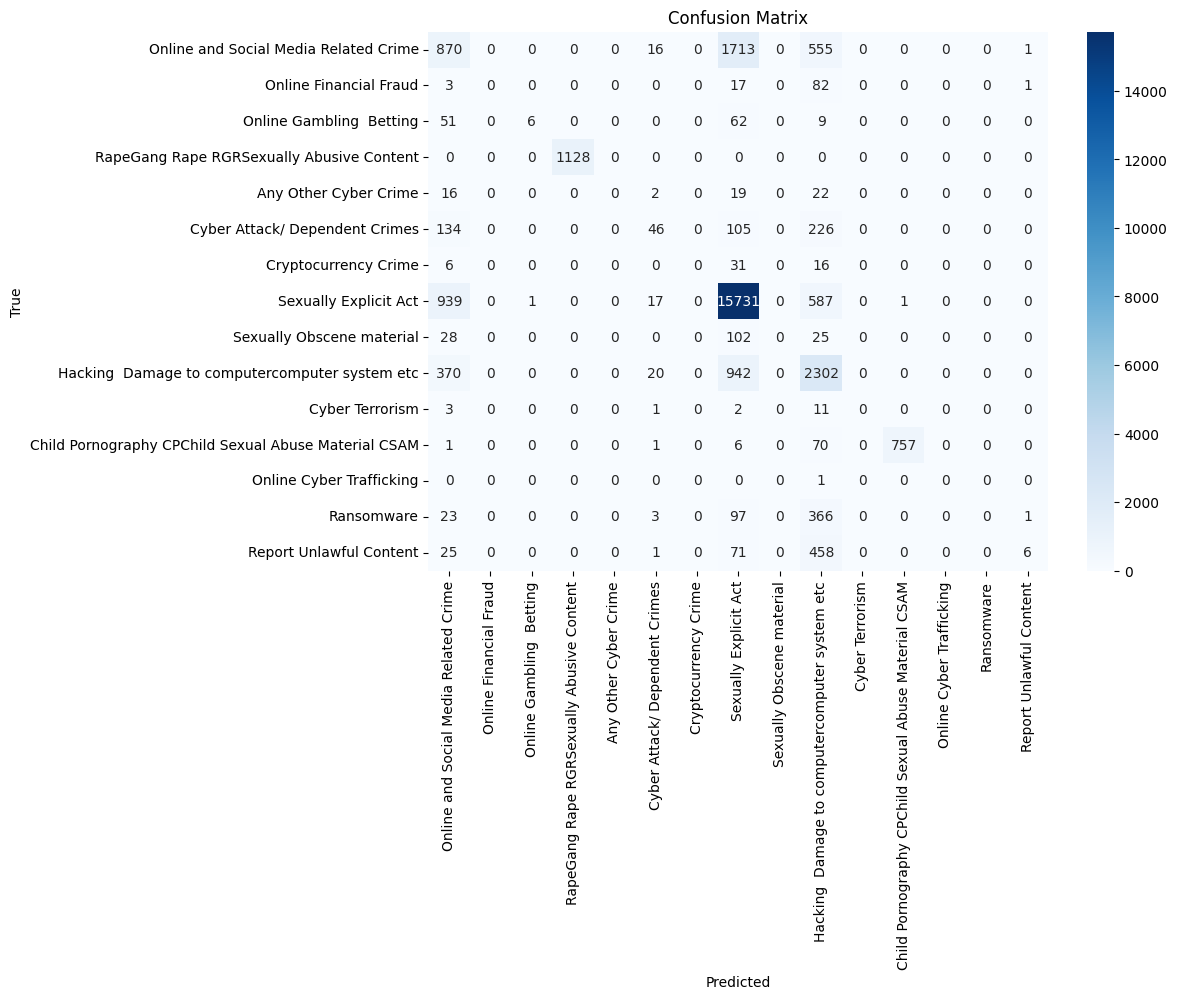

In [19]:
# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
